In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import os
%matplotlib inline

In [34]:
video_file = "/oak/stanford/groups/trc/data/Brezovec/ryan_paper/bigrig.mkv"

In [35]:
cap = cv2.VideoCapture(video_file)

In [19]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)/7

2722.0

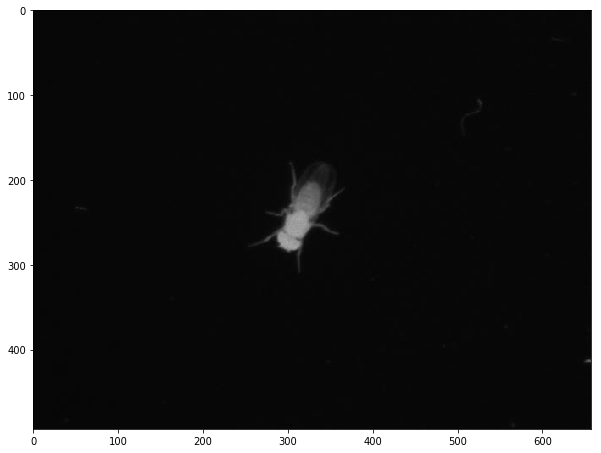

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(frame)

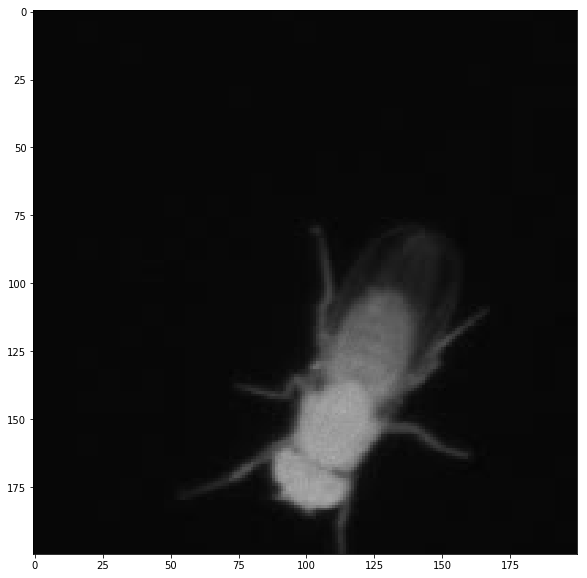

In [36]:
myFrameNumber = 2743.0
cap.set(cv2.CAP_PROP_POS_FRAMES,myFrameNumber)
ret, frame = cap.read()
plt.figure(figsize=(10,10))
plt.imshow(frame[100:300,200:400,:])

In [38]:
grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [39]:
grayFrame.shape

(494, 658)

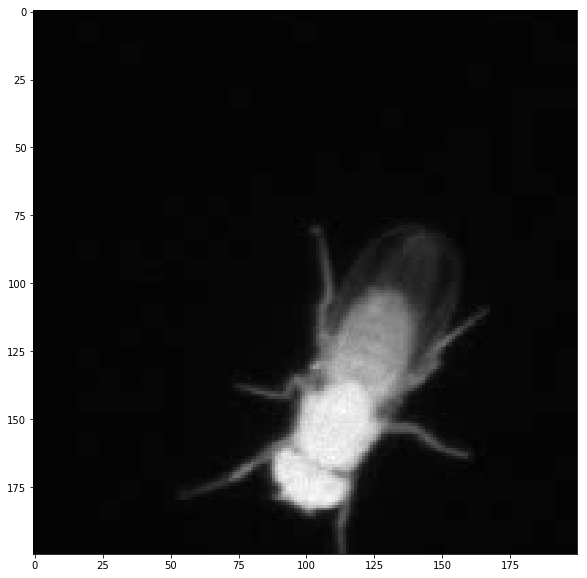

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(grayFrame[100:300,200:400],cmap='gray')

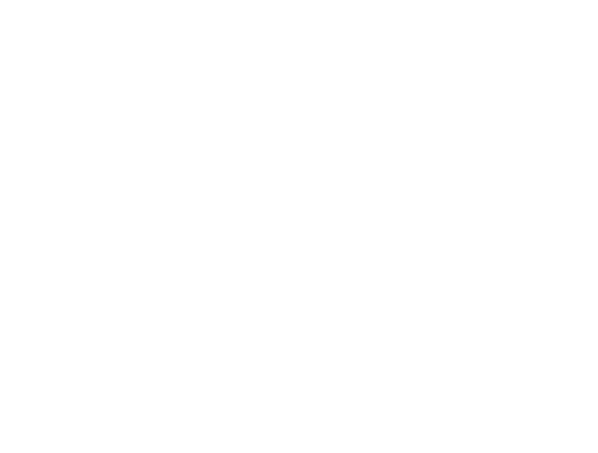

In [106]:
plt.figure(figsize=(10,10))
plt.imshow(frame,cmap='gray')
plt.axis('off')

save_path = '/oak/stanford/groups/trc/data/Brezovec/ryan_paper/'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

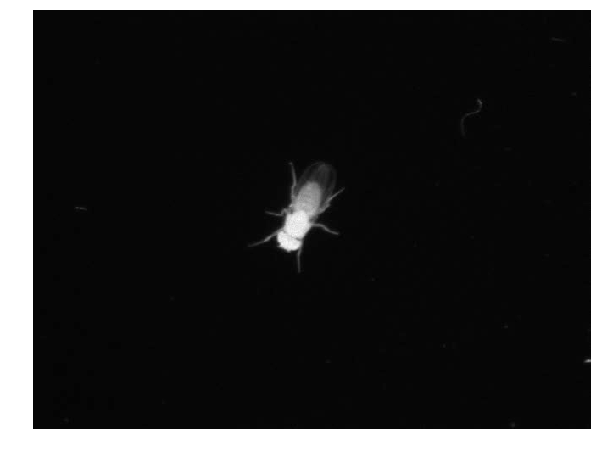

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(grayFrame,cmap='gray')
plt.axis('off')

save_path = '/oak/stanford/groups/trc/data/Brezovec/ryan_paper/'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [59]:
np.mean(grayFrame)*1.6

13.224010927482372

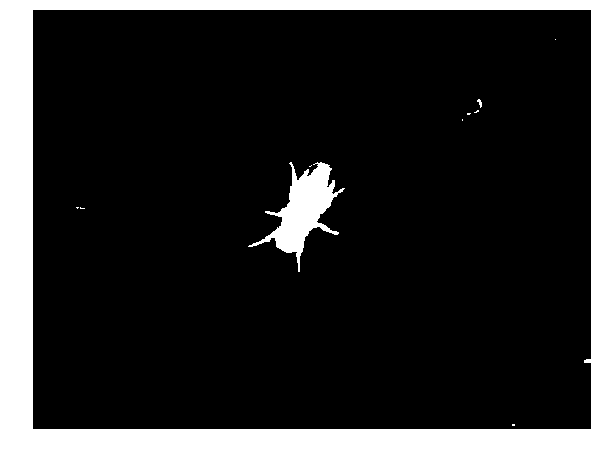

In [76]:
_, mask = cv2.threshold(grayFrame, 20, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.imshow(mask,cmap='gray')

plt.axis('off')

save_path = '/oak/stanford/groups/trc/data/Brezovec/ryan_paper/'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [77]:
# extract contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)



In [78]:

# make list of tuples: (contour, area)
results = [(c, cv2.contourArea(c)) for c in contours]

# filter out contours that are too small
#min_area_px = self.convert_area(self.params['min_fly_area'])
#results = [res for res in results if res[1] >= min_area_px]
#print(len(results))

In [80]:
len(results)

9

In [97]:
results[4]

(array([[[303, 179]],
 
        [[302, 180]],
 
        [[302, 181]],
 
        ...,
 
        [[305, 180]],
 
        [[305, 179]],
 
        [[304, 179]]], dtype=int32), 4532.5)

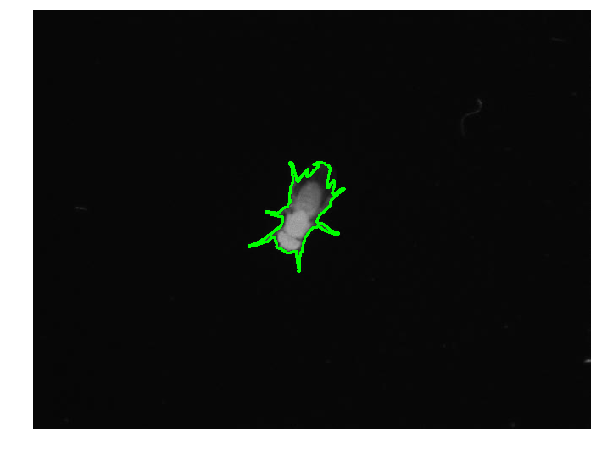

In [142]:
plt.figure(figsize=(10,10))
drawFrame = frame.copy()
cv2.drawContours(drawFrame, [results[4][0]], 0, (0, 255, 0), 2)
plt.imshow(drawFrame)
plt.axis('off')
save_path = '/oak/stanford/groups/trc/data/Brezovec/ryan_paper/'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [143]:
def mask_from_contour(img, contour, color='white'):
    """
    Returns a mask (binary image) selecting only the interior of the contour.
    """

    if color == 'white':
        start_mask = np.zeros(img.shape, dtype=np.uint8)
        contour_color = 255
    elif color == 'black':
        start_mask = np.uint8(255)*np.ones(img.shape, dtype=np.uint8)
        contour_color = 0
    else:
        raise Exception('Invalid color')

    cv2.drawContours(start_mask, [contour], 0, (contour_color, contour_color, contour_color), -1)

    return start_mask

def crop_to_contour(img, contour):
    """
    Returns an ImagePatch containing only the given contour.
    """

    # create a mask of the contour
    mask = mask_from_contour(img, contour)

    # crop to ROI
    roi = contour_roi(contour)
    img = img[roi]
    mask = mask[roi]

    # apply mask
    img = cv2.bitwise_and(img, img, mask=mask)

    return ImagePatch(img=img, mask=mask, ulx=roi[1].start, uly=roi[0].start)

In [145]:
c_mask = mask_from_contour(grayFrame, results[4][0], color='white')

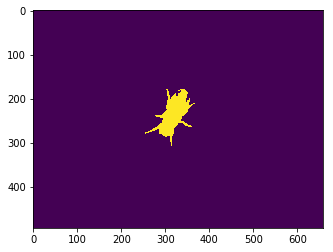

In [146]:
plt.imshow(c_mask)

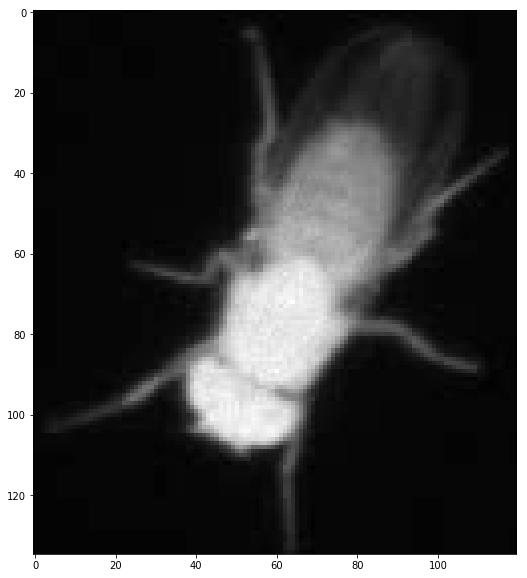

In [163]:
plt.figure(figsize=(10,10))
plt.imshow(grayFrame[175:310,250:370],cmap='gray')
#plt.axis('off')

save_path = '/oak/stanford/groups/trc/data/Brezovec/ryan_paper/'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')